<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [108]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import xgboost as xgb

## Load and Prepare Data

In [81]:
df=pd.read_csv("C:\\Users\\Surface Book\\Desktop\\Mini Project 3 - Classification(Titanic)\\train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## EDA

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Preprocessing

In [82]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

pclass=pd.get_dummies(df['Pclass'],drop_first=True)
df=pd.concat([df,pclass],axis=1)
df.rename(columns={2:'cls2',3:'cls3',1:'cls1'},inplace=True)

df=df.drop('Cabin',1)

df = df[df['Embarked'].notna()]

df[['Age']] = df[['Age']].fillna(value=int(df[['Age']].mean(axis=0)))
emb=pd.get_dummies(df['Embarked'],drop_first=True)
df=pd.concat([df,emb],axis=1)
print(df.info())
print(df.isnull().sum())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  cls2         889 non-null    uint8  
 12  cls3         889 non-null    uint8  
 13  Q            889 non-null    uint8  
 14  S            889 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(4)
memory usage: 86.8+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
S

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cls2,cls3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1


In [83]:
x=df.drop(columns=['PassengerId','Survived','Pclass','Name','Ticket','Embarked']).values
y=df['Survived'].values
x[0]

array([ 1.  , 22.  ,  1.  ,  0.  ,  7.25,  0.  ,  1.  ,  0.  ,  1.  ])

## Strorytelling - Visualization

<AxesSubplot:>

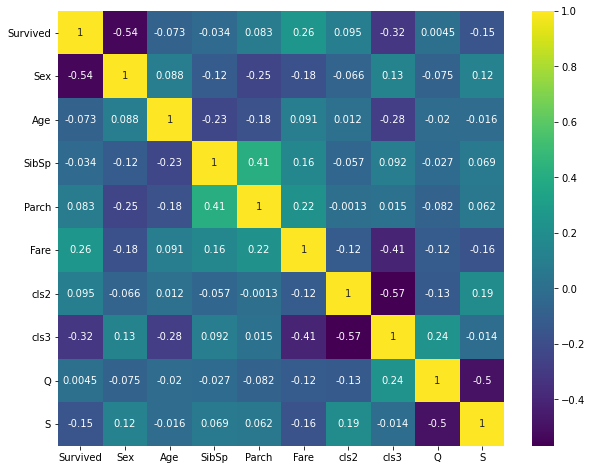

In [84]:
corr = df[['Survived','Sex','Age','SibSp','Parch','Fare','cls2','cls3','Q','S']].corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, cmap='viridis', annot=True)

## Train your model (Classification)

In [85]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(711, 9)
(711,)
(178, 9)
(178,)


In [116]:
Results=pd.DataFrame([],index=['LogReg','KNN','DT','RF','SVM','XGB'])
Results

""
LogReg
KNN
DT
RF
SVM
XGB


### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn import metrics

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))
Results.loc['LogReg','Score']=(metrics.accuracy_score(y_test, y_pred))
pd.crosstab(logreg.predict(X),y)

The accuracy of Logistic Regression is:  0.8539325842696629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


col_0,0,1
row_0,,
0,481,103
1,68,237


<AxesSubplot:>

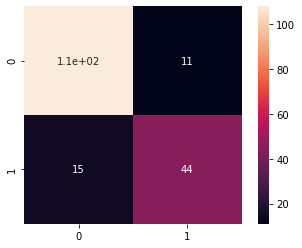

In [87]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

### KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy of KNN is: ', (metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
Results.loc['KNN','Score']=(metrics.accuracy_score(y_test, y_pred))

The accuracy of KNN is:  0.6741573033707865
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       119
           1       0.51      0.51      0.51        59

    accuracy                           0.67       178
   macro avg       0.63      0.63      0.63       178
weighted avg       0.67      0.67      0.67       178



<AxesSubplot:>

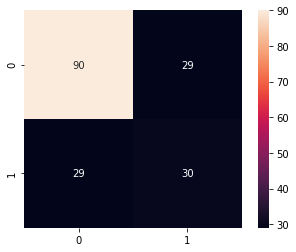

In [67]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

### Decision Tree

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The accuracy of DT is: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Results.loc['DT','Score']=(metrics.accuracy_score(y_test, y_pred))

The accuracy of DT is:  0.7640449438202247
[[96 23]
 [19 40]]


<AxesSubplot:>

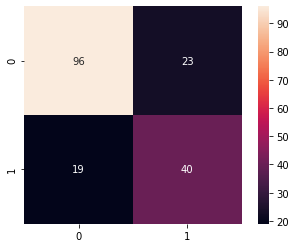

In [97]:
sns.heatmap(cm, square=True , annot=True)

### Random Forest

In [121]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
y_pred = rfc.predict(X_test)
print('The accuracy of RF is: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Results.loc['RF','Score']=(metrics.accuracy_score(y_test, y_pred))

The accuracy of RF is:  0.8370786516853933
[[106  13]
 [ 16  43]]


<AxesSubplot:>

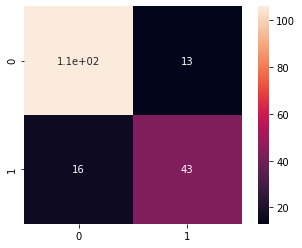

In [103]:
sns.heatmap(cm, square=True , annot=True)

### SVM

In [122]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print('The accuracy of SVM is: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Results.loc['SVM','Score']=(metrics.accuracy_score(y_test, y_pred))

The accuracy of SVM is:  0.8426966292134831
[[106  13]
 [ 15  44]]


<AxesSubplot:>

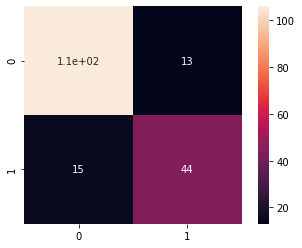

In [107]:
sns.heatmap(cm, square=True , annot=True)

### XGBoost

In [123]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of XGBoost is: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
Results.loc['XGB','Score']=(metrics.accuracy_score(y_test, y_pred))

[20:56:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGBoost is:  0.8089887640449438
[[102  17]
 [ 17  42]]


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

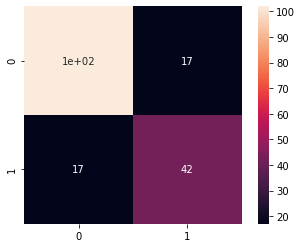

In [111]:
sns.heatmap(cm, square=True , annot=True)

## Test Result

In [125]:
Results*100

,Score
LogReg,85.393258
KNN,67.415730
DT,76.404494
RF,83.707865
SVM,84.269663
XGB,80.898876


## Send us the Result (Maktabkhoone)